<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Regression/Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [180]:
df=pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [181]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [182]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [183]:
df.duplicated().sum()

1

In [184]:
df.drop_duplicates(inplace=True)

In [185]:
df.shape

(1337, 7)

In [186]:
def remove_outliers(data_frame, series_col):
 Q1 = np.percentile(series_col, 25)
 Q3 = np.percentile(series_col, 75)
 IQR = Q3 - Q1
 Lower_Limit = Q1 - 1.5 * IQR
 Upper_Limit = Q3 + 1.5 * IQR
 data_frame = data_frame[(series_col >Lower_Limit) & (series_col < Upper_Limit)]
 return data_frame

In [187]:
label_encoder = LabelEncoder()
def label_encoding(series_col):
  return label_encoder.fit_transform(series_col)

In [188]:
onehot_encoder = OneHotEncoder()
def onehot_encoding(series_col):
  return onehot_encoder.fit_transform(series_col)

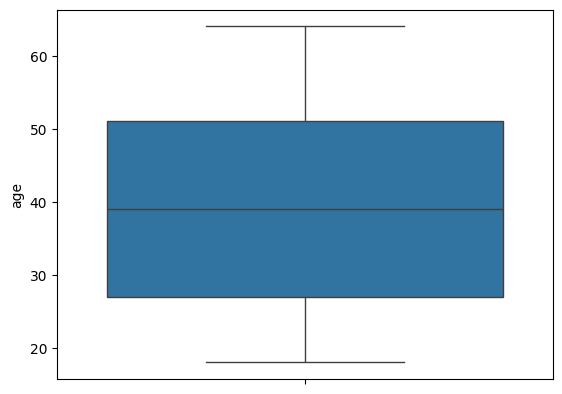

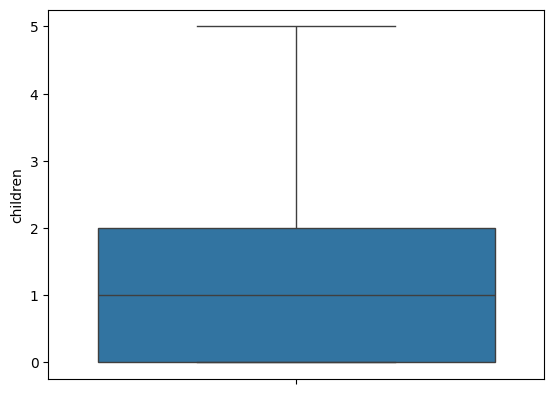

In [189]:
int_cols=df.select_dtypes('int64').columns
for col in int_cols:
  sns.boxplot(df[col])
  plt.show()

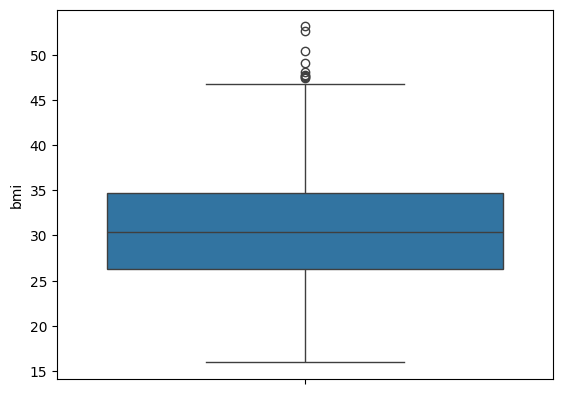

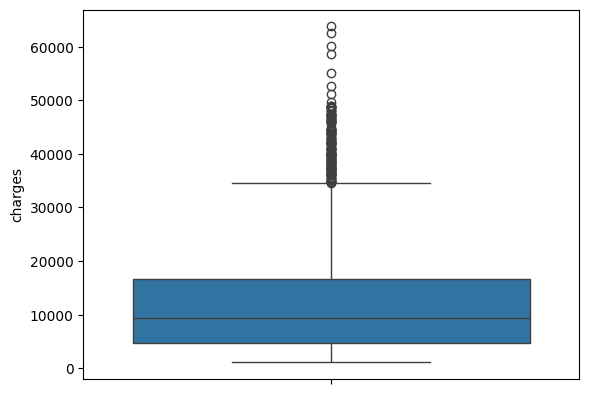

In [190]:
int_cols=df.select_dtypes('float').columns
for col in int_cols:
  sns.boxplot(df[col])
  plt.show()

BMI and charges have outliers

In [191]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [192]:
df=remove_outliers(df,df['charges'])
df=remove_outliers(df,df['bmi'])

In [193]:
df.shape

(1185, 7)

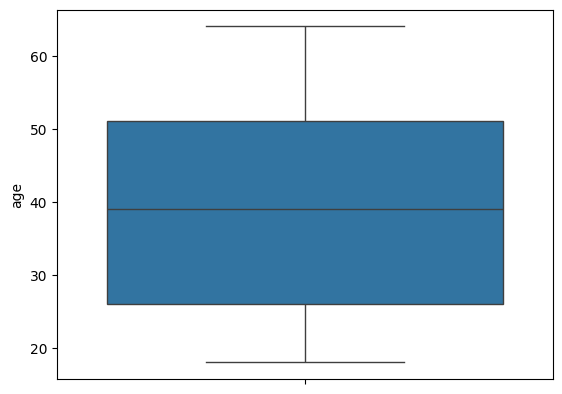

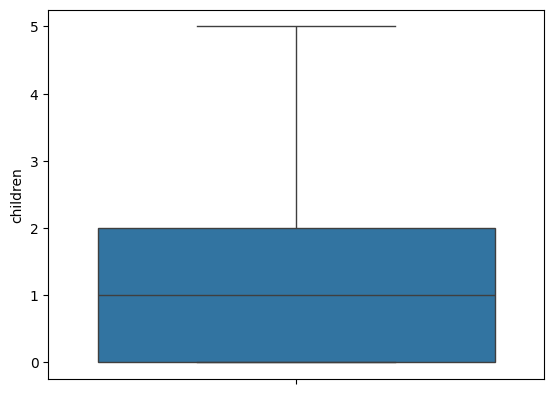

In [194]:
int_cols=df.select_dtypes('int64').columns
for col in int_cols:
  sns.boxplot(df[col])
  plt.show()

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1185 non-null   int64  
 1   sex       1185 non-null   object 
 2   bmi       1185 non-null   float64
 3   children  1185 non-null   int64  
 4   smoker    1185 non-null   object 
 5   region    1185 non-null   object 
 6   charges   1185 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.1+ KB


In [196]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


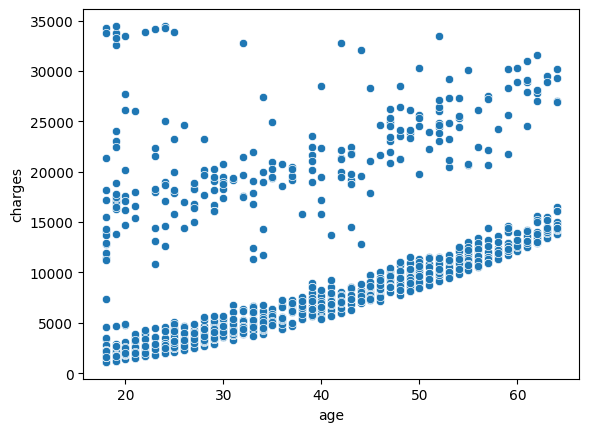

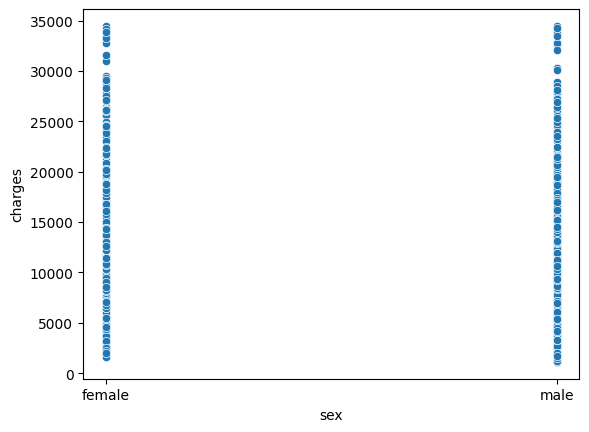

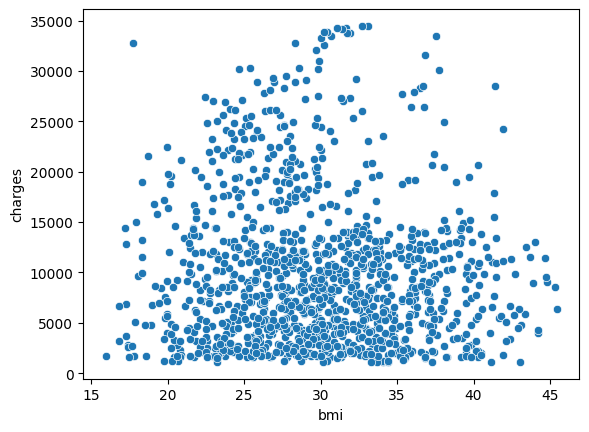

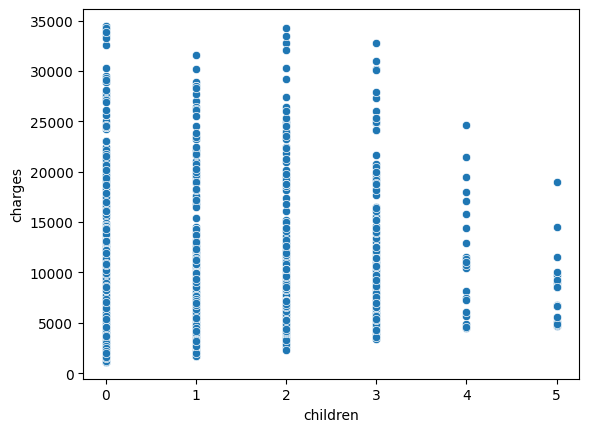

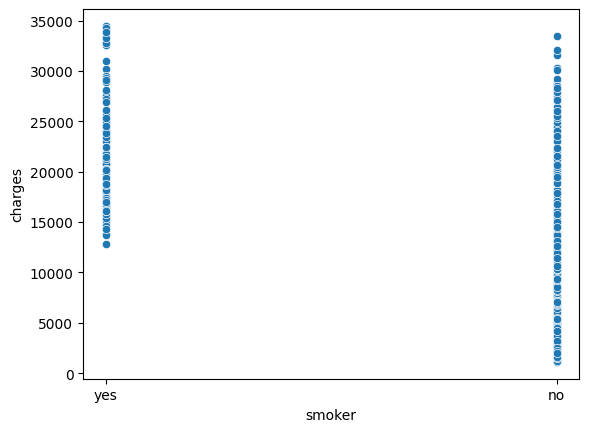

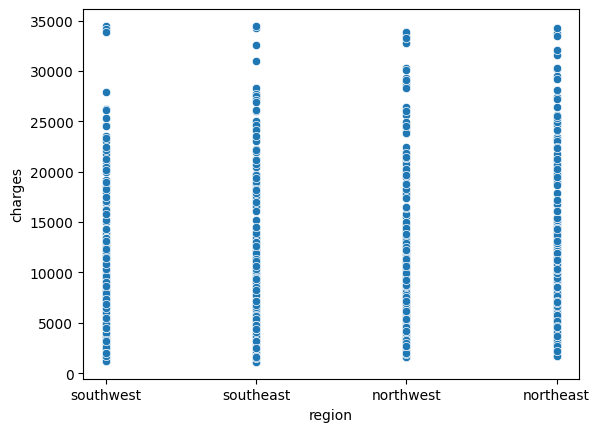

In [197]:
#Encode categorical columns
cate_cols = df.columns

for col in cate_cols:
  if(col!='charges'):
   sns.scatterplot(data=df, x=col, y='charges')
   plt.show()

All these parameters are distributed better(uniformly). And affect the target feature selling_price. How much each parameter affect selling_price , relativley, we will have to use heatmap for that. but to use heatmap we will have to convert categorical columns to numerical columns.

In [198]:
cate_cols= df.select_dtypes('object')
for col in cate_cols:
  df[(col+'_encode')]=label_encoding(df[col])

In [199]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode,region_encode
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


<class 'pandas.core.indexes.base.Index'>


<Axes: >

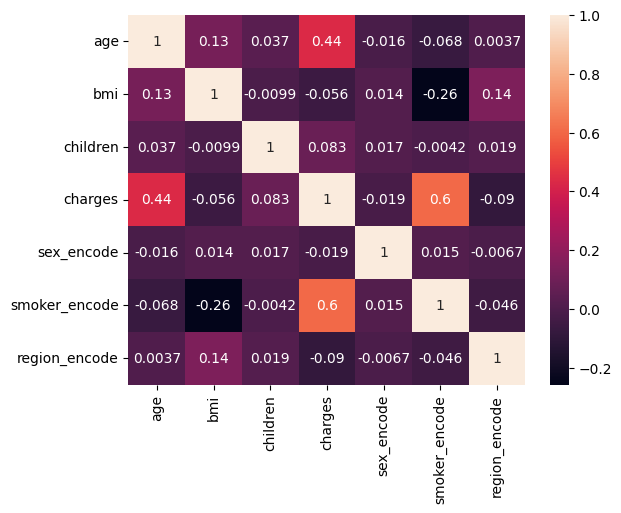

In [200]:
num_cols = df.select_dtypes(['int64','float64']).columns
print(type(num_cols))
corr=df[num_cols].corr()
sns.heatmap(corr, annot=True)


selling_price has strong correlation with smoker and age. we can base our model on smoker only , in case of more accuracy can include age.
Both scatterplot and heatmap should be looked at to understand correlation and which features to consider for model

In [201]:
df.shape

(1185, 10)

In [202]:
X =np.array(df['smoker_encode']).reshape(-1,1)
Y =np.array(df['charges']).reshape(-1,1)
X_test,X_train,Y_test,Y_train =train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [203]:
y_pred=model.predict(X_test)

In [204]:
r2=r2_score(Y_test, y_pred)
print(r2)

0.3432417615238471


When Linear Regression is don with feature variable car_age, the r2 score /accuracy is 35.8%

In [205]:
X =np.array(df['age']).reshape(-1,1)
Y =np.array(df['charges']).reshape(-1,1)
X_test,X_train,Y_test,Y_train =train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [206]:
y_pred=model.predict(X_test)

In [207]:
r2=r2_score(Y_test, y_pred)
print(r2)

0.16783864415680538


With just age as feature variable, r2 score is 19%

In [208]:
X =df[['age','smoker_encode']]
Y =np.array(df['charges']).reshape(-1,1)
X_test,X_train,Y_test,Y_train =train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [209]:
y_pred=model.predict(X_test)

In [210]:
r2=r2_score(Y_test, y_pred)
print(r2)

0.5626143564407615


When Linear Regression is done with feature variable car_age and fuel_encode, the r2 score /accuracy is 59.05%

In [214]:
X =df[['age','smoker_encode','children']]
Y =np.array(df['charges']).reshape(-1,1)
X_test,X_train,Y_test,Y_train =train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [215]:
y_pred=model.predict(X_test)

In [216]:
r2=r2_score(Y_test, y_pred)
print(r2)

0.5892969935755279


In [220]:
X =df[['age','smoker_encode','children','bmi']]
Y =np.array(df['charges']).reshape(-1,1)
X_test,X_train,Y_test,Y_train =train_test_split(X,Y,test_size=0.2)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [221]:
y_pred=model.predict(X_test)

In [222]:
r2=r2_score(Y_test, y_pred)
print(r2)

0.593792447377858


*If I want to include one more parameter and I have to choose out of two parameteres , one is with -ve corr and other +ve corr with target variable, which one to choose and why ?*